In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import pandas as pd
import pickle

# Analysing Workload of Cobots / Batches

In [2]:
listee = {'OutD0_0': [16.59], 'OutD0_1': [9.5, 8.25], 
          'OutD0_3': [11.79, 5.37, 0.69], 'OutD0_4': [10.269999999999998, 2.93, 4.25], 
          'OutD0_5': [1.61, 13.52, 1.9], 'OutD0_7': [2.51, 8.88, 3.27], 
          'OutD0_8': [17.230000000000004], 'OutD1_9': [15.120000000000001], 
          'OutD0_10': [16.18], 'OutD0_2': [7.06, 5.01]}

In [3]:
listee = {'OutD0_0': [17.230000000000004], 'OutD0_1': [9.5, 8.25], 'OutD0_2': [1.9, 3.27], 
          'OutD1_3': [11.79, 5.37, 0.69], 'OutD1_4': [10.269999999999998, 2.93, 4.25], 
          'OutD1_5': [16.18, 1.61], 'OutD1_6': [8.88, 7.06], 'OutD1_7': [5.01, 2.51], 
          'OutD1_8': [13.52], 'OutD1_9': [16.59], 'OutD1_10': [15.120000000000001]}

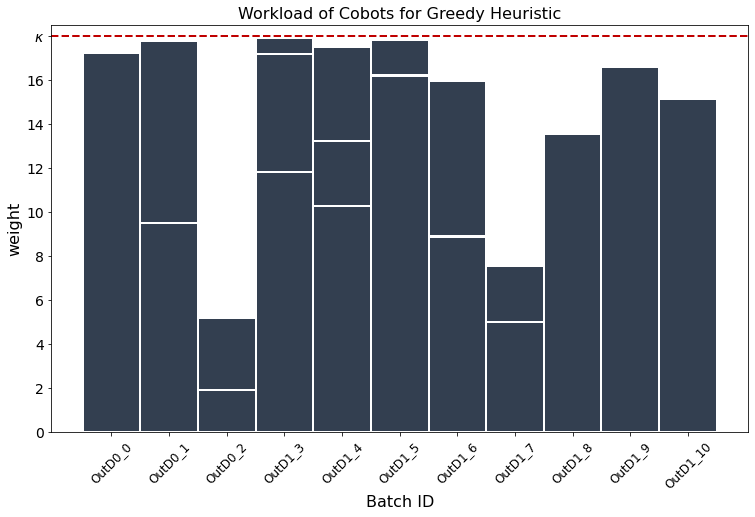

In [4]:
width = 2
toggle_h = .3
toggle_v = .01
fig, ax = plt.subplots()
for count, value in enumerate(listee.values()):
    curr_height = 0
    for height in value:
        rect = patches.Rectangle((count*width, curr_height), 
                                 width=width, height=height,
                                 facecolor = '#333F50', edgecolor = 'w', lw=2)
        curr_height += height+toggle_v        
        ax.add_patch(rect)
ax.autoscale_view()
ax.figure.canvas.draw()

box_widths = np.arange(0, len(listee.keys())*width+1, width)
xticks = []
for first, second in zip(box_widths, box_widths[1:]):
    xticks.append((first + second) / 2)
ax.set_xticks(xticks)
ax.set_xticklabels(listee.keys())
ax.axhline(y=18, c="#C00000", lw=2, linestyle="--")
ax.set_yticks(np.arange(0, 19, 2))
ax.set_yticklabels(list(np.arange(0, 17, 2))+["$\kappa$"])
ax.tick_params(axis="y", which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=45)
ax.set_ylabel("weight", fontsize=16)
ax.set_xlabel("Batch ID", fontsize=16)
ax.set_ylim((0,18.5))
plt.title("Workload of Cobots for Greedy Heuristic", fontsize=16)
fig.set_size_inches(12.5, 7.5)
#ax.set_aspect('equal')
plt.savefig('../../../figures/sol.eps',bbox_inches='tight', transparent="False", format="eps")
plt.show()

# Runtime Analysis

In [5]:
# sku 24, orders_10_mean_1x6_sku, dedicated
runtime_dict_24_10 = {0: 85.1, 5: 66.2, 10: 64.39999999999999, 
                      20: 64.39999999999999, 30: 64.4, 50: 64.4, 70: 64.39999999999999}
runtime_dict_24_10 = {k: (v -  minimum) / v for minimum in (min(runtime_dict_24_10.values()),) for k, v in runtime_dict_24_10.items()}

In [6]:
runtime_dict_360_10 = {0: 819.5999999999997, 5: 750.8999999999996, 10: 755.1999999999998, 
                       20: 738.5999999999997, 30: 763.1999999999998, 50: 748.7999999999997, 70: 741.8999999999997}
runtime_dict_360_10 = {k: (v - minimum) / v for minimum in (min(runtime_dict_360_10.values()),) for k, v in runtime_dict_360_10.items()}

In [7]:
runtime_dict_24_20 = {0: 420.5, 5: 381.4, 10: 377.8, 20: 377.8, 30: 376.0, 50: 362.2, 
                      80: 362.19999999999993, 120: 362.19999999999993}

In [8]:
df_24_10 = pd.DataFrame.from_dict(runtime_dict_24_10, orient="index").reset_index()
df_24_10.columns = ["Runtime", "Fitness (24, 10)"]
df_360_10 = pd.DataFrame.from_dict(runtime_dict_360_10, orient="index").reset_index()
df_360_10.columns = ["Runtime", "Fitness (360, 10)"]

In [9]:
df = df_24_10.merge(df_360_10)

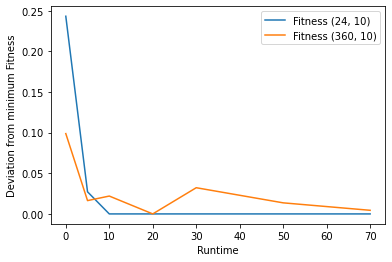

In [10]:
df.plot(x="Runtime")
plt.ylabel("Deviation from minimum Fitness")
plt.show()

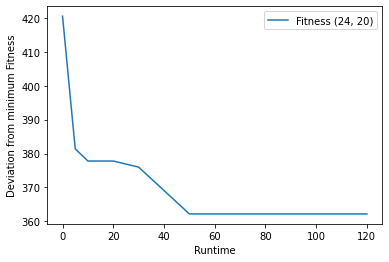

In [11]:
df_24_10 = pd.DataFrame.from_dict(runtime_dict_24_20, orient="index").reset_index()
df_24_10.columns = ["Runtime", "Fitness (24, 20)"]
df_24_10.plot(x="Runtime")
plt.ylabel("Deviation from minimum Fitness")
plt.show()

In [12]:
a = {'OutD1_1': ['7', '2', '9', '10'], 'OutD0_3': ['7', '2', '10', '11', '16'], 
     'OutD0_6': ['15', '16', '11', '10', '9', '2', '7'], 'OutD1_10': ['15', '1', '2', '9', '10', '4', '11'], 
     'OutD0_7': ['1', '2', '10', '4', '11', '16', '15'], 'OutD0_2': ['7', '1', '2', '9', '4', '11', '16', '15'], 
     'OutD1_4': ['1', '9', '10', '11'], 'OutD0_8': ['4', '10', '2', '7'], 
     'OutD0_5': ['1', '7', '2', '9', '11', '16', '15'], 'OutD0_9': ['1', '9', '10', '4', '11', '15']}

### Get Latex Code from Cobot Tours

In [50]:
with open('solutions/dedicated3.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [51]:
def latex_string_from_route(route):
    latex_string = ""
    count = 1
    for key, value in route.items():
        latex_string +=  "{} & ".format(str(count))
        for i, node in enumerate(value):
            if i == len(value)-1:
                latex_string += node
            else:
                latex_string += node +  f" $\\rightarrow$ "
        latex_string += " \\\\" + "\n \n"
        count+=1
    return latex_string 

In [52]:
for key, value in b.items():
    min_runtime = min(value, key=value.get)
    fitness, value = value[min_runtime]

    route = value
    #fitness, route = solution
    sku, subscript, num_orders = key
    print('orders_{}_mean_5_sku_{}{}'.format(str(num_orders), sku, subscript) + 
          "\n--------------------------------------------------------------- \n\n"+
          "{} after {} seconds".format(str(fitness), str(min_runtime)) + "\n\n"+
          latex_string_from_route(route))

orders_20_mean_5_sku_24
--------------------------------------------------------------- 

374.19999999999993 after 20 seconds

1 & OutD1 $\rightarrow$ 2 $\rightarrow$ 7 $\rightarrow$ 9 $\rightarrow$ 10 $\rightarrow$ OutD1 \\
 
2 & OutD0 $\rightarrow$ 15 $\rightarrow$ 16 $\rightarrow$ 11 $\rightarrow$ 4 $\rightarrow$ 9 $\rightarrow$ 2 $\rightarrow$ 1 $\rightarrow$ OutD0 \\
 
3 & OutD0 $\rightarrow$ 15 $\rightarrow$ 16 $\rightarrow$ 11 $\rightarrow$ 10 $\rightarrow$ 9 $\rightarrow$ 2 $\rightarrow$ 7 $\rightarrow$ OutD0 \\
 
4 & OutD1 $\rightarrow$ 4 $\rightarrow$ 10 $\rightarrow$ 11 $\rightarrow$ 16 $\rightarrow$ 15 $\rightarrow$ OutD1 \\
 
5 & OutD1 $\rightarrow$ 16 $\rightarrow$ 15 $\rightarrow$ 1 $\rightarrow$ 7 $\rightarrow$ 2 $\rightarrow$ 10 $\rightarrow$ 11 $\rightarrow$ OutD1 \\
 
6 & OutD0 $\rightarrow$ 16 $\rightarrow$ 11 $\rightarrow$ 10 $\rightarrow$ 2 $\rightarrow$ 7 $\rightarrow$ OutD0 \\
 
7 & OutD1 $\rightarrow$ 15 $\rightarrow$ 1 $\rightarrow$ 2 $\rightarrow$ 9 $\rightar

In [35]:
with open('solutions/mixed16.pickle', 'rb') as handle:
    mixed = pickle.load(handle)

In [36]:
def latex_string_from_mixed_route(route):
    latex_string = ""
    count = 1
    for key, value in route.items():
        latex_string +=  "{} & ".format(str(count)) + key.split("_")[0] + " $\\rightarrow$ "
        for i, node in enumerate(value):
            latex_string += node +  f" $\\rightarrow$ "
        latex_string += key.split("_")[0] +  " \\\\" + "\n \n"
        count+=1
    return latex_string 

In [37]:
for key, value in mixed.items():
    min_runtime = min(value, key=value.get)
    fitness, value = value[min_runtime]

    route = value
    #fitness, route = solution
    sku, subscript, num_orders = key
    print('orders_{}_mean_5_sku_{}{}'.format(str(num_orders), sku, subscript) + 
          "\n--------------------------------------------------------------- \n\n"+
          "{} after {} seconds".format(str(fitness), str(min_runtime)) + "\n\n"+
          latex_string_from_mixed_route(route))

orders_10_mean_5_sku_360
--------------------------------------------------------------- 

387.69999999999993 after 5 seconds

1 & OutD0 $\rightarrow$ 61 $\rightarrow$ 64 $\rightarrow$ 69 $\rightarrow$ 73 $\rightarrow$ 43 $\rightarrow$ 130 $\rightarrow$ 122 $\rightarrow$ 151 $\rightarrow$ OutD0 \\
 
2 & OutD0 $\rightarrow$ 151 $\rightarrow$ 125 $\rightarrow$ 159 $\rightarrow$ 130 $\rightarrow$ 163 $\rightarrow$ 102 $\rightarrow$ 103 $\rightarrow$ 74 $\rightarrow$ 193 $\rightarrow$ OutD0 \\
 
3 & OutD0 $\rightarrow$ 64 $\rightarrow$ 66 $\rightarrow$ 69 $\rightarrow$ 102 $\rightarrow$ 107 $\rightarrow$ 43 $\rightarrow$ 36 $\rightarrow$ 31 $\rightarrow$ OutD0 \\
 
4 & OutD0 $\rightarrow$ 122 $\rightarrow$ 159 $\rightarrow$ 47 $\rightarrow$ 43 $\rightarrow$ 12 $\rightarrow$ 42 $\rightarrow$ 31 $\rightarrow$ OutD0 \\
 
5 & OutD0 $\rightarrow$ 66 $\rightarrow$ 69 $\rightarrow$ 101 $\rightarrow$ 73 $\rightarrow$ 159 $\rightarrow$ OutD0 \\
 

orders_10_mean_5_sku_360_b
------------------------

In [31]:
print(latex_string_from_mixed_route({'OutD1_0': ['14', '21', '22', '16', '23'], 'OutD1_1': ['16', '22', '17']}))

1 & OutD1 $\rightarrow$ 14 $\rightarrow$ 21 $\rightarrow$ 22 $\rightarrow$ 16 $\rightarrow$ 23 $\rightarrow$ OutD1 \\
 
2 & OutD1 $\rightarrow$ 16 $\rightarrow$ 22 $\rightarrow$ 17 $\rightarrow$ OutD1 \\
 

